In [2]:
# minist dataset: http://yann.lecun.com/exdb/mnist/

from torchvision.datasets import MNIST
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
train = MNIST("./data/", train=True, download=True) #60000
test= MNIST("./data/",train=False, download=True) #10000

label:  0
size:  (28, 28)
max pixle value:  255


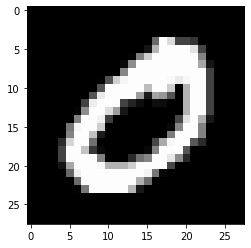

In [4]:
# show random train sample
num = np.random.randint(len(train))

plt.imshow(train[num][0], cmap='gray')
print("label: ", train[num][1])

print("size: ", train[num][0].size)

print("max pixle value: ", np.max(train[num][0]))

## Network 

In [ ]:
import math

class Conv2d():
    def __init__(self,in_channels,out_channels,kernel_size,stride,padding=0):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = [kernel_size,kernel_size] if isinstance(kernel_size, int) else [int(x) for x in kernel_size]
        self.stride = [stride,stride] if isinstance(stride, int) else [int(x) for x in stride]
        self.padding = [padding,padding] if isinstance(padding, int) else [int(x) for x in padding]
    def __call__(self,x):
        in_w, in_h, in_c = x.shape 
        out_h = math.floor( (in_h + 2*pad_h - dil_h*(k_h-1) - 1)/s_h + 1)
        

In [36]:
# conv case 1
np.random.seed(123)
x = np.random.rand(5,5,1)

In [37]:
x

array([[[0.69646919],
        [0.28613933],
        [0.22685145],
        [0.55131477],
        [0.71946897]],

       [[0.42310646],
        [0.9807642 ],
        [0.68482974],
        [0.4809319 ],
        [0.39211752]],

       [[0.34317802],
        [0.72904971],
        [0.43857224],
        [0.0596779 ],
        [0.39804426]],

       [[0.73799541],
        [0.18249173],
        [0.17545176],
        [0.53155137],
        [0.53182759]],

       [[0.63440096],
        [0.84943179],
        [0.72445532],
        [0.61102351],
        [0.72244338]]])

In [38]:
kernel = np.random.rand(3,3,1)

In [39]:
x.shape

(5, 5, 1)

In [40]:
kernel

array([[[0.32295891],
        [0.36178866],
        [0.22826323]],

       [[0.29371405],
        [0.63097612],
        [0.09210494]],

       [[0.43370117],
        [0.43086276],
        [0.4936851 ]]])

In [47]:
x[0:3,0:3]

array([[[0.69646919],
        [0.28613933],
        [0.22685145]],

       [[0.42310646],
        [0.9807642 ],
        [0.68482974]],

       [[0.34317802],
        [0.72904971],
        [0.43857224]]])

In [50]:
(x[0:3,0:3]*kernel).sum()

1.865895708470751

In [51]:
x[0:3,1:4]

array([[[0.28613933],
        [0.22685145],
        [0.55131477]],

       [[0.9807642 ],
        [0.68482974],
        [0.4809319 ]],

       [[0.72904971],
        [0.43857224],
        [0.0596779 ]]])

In [52]:
(x[0:3,1:4]*kernel).sum()

1.5994163112883744

In [53]:
(x[0:3,2:5]*kernel).sum()

1.390098858176254

In [55]:
_ = []
for i in range(x.shape[0]):
    i_ = i+kernel.shape[0]
    for j in range(x.shape[1]):
        j_ = j+kernel.shape[1]
        if (i_ > x.shape[0]) or (j_ > x.shape[1]):
            continue
        filed = x[i:i_,j:j_]
        _.append(filed)
        print(filed)

[[[0.69646919]
  [0.28613933]
  [0.22685145]]

 [[0.42310646]
  [0.9807642 ]
  [0.68482974]]

 [[0.34317802]
  [0.72904971]
  [0.43857224]]]
[[[0.28613933]
  [0.22685145]
  [0.55131477]]

 [[0.9807642 ]
  [0.68482974]
  [0.4809319 ]]

 [[0.72904971]
  [0.43857224]
  [0.0596779 ]]]
[[[0.22685145]
  [0.55131477]
  [0.71946897]]

 [[0.68482974]
  [0.4809319 ]
  [0.39211752]]

 [[0.43857224]
  [0.0596779 ]
  [0.39804426]]]
[[[0.42310646]
  [0.9807642 ]
  [0.68482974]]

 [[0.34317802]
  [0.72904971]
  [0.43857224]]

 [[0.73799541]
  [0.18249173]
  [0.17545176]]]
[[[0.9807642 ]
  [0.68482974]
  [0.4809319 ]]

 [[0.72904971]
  [0.43857224]
  [0.0596779 ]]

 [[0.18249173]
  [0.17545176]
  [0.53155137]]]
[[[0.68482974]
  [0.4809319 ]
  [0.39211752]]

 [[0.43857224]
  [0.0596779 ]
  [0.39804426]]

 [[0.17545176]
  [0.53155137]
  [0.53182759]]]
[[[0.34317802]
  [0.72904971]
  [0.43857224]]

 [[0.73799541]
  [0.18249173]
  [0.17545176]]

 [[0.63440096]
  [0.84943179]
  [0.72445532]]]
[[[0.72904971

In [56]:
len(_)

9

In [ ]:
def conv_test(x, kernel):
    out